In [1]:
from avp.video.camera import camera

from avp.video.photo import ndphoto

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow

import numpy as np

import cv2

**Changing Camera settings** 

is OS and device specific; for eg, Windows uses DirectShow API and then the various camera-hardware will often have specific values that one must use -- for a particular property; however, one may still try setting some of the properties of  `vcam` -- which uses OpenCV2 internally.

**Below we print some of the property values using using the `vc.__str__`. Note that _getting_ the property values is consistent -- for most of the properties.**

The properties include `vc.fps, *vc.resolution, vc.brightness, vc.contrast, vc.saturation, vc.gamma, vc.gain`.

**The `vcam` instance has an OpenCV2 instance of `VideoCapture` accessible via `vc.inner` -- for use of the lower-level backend OpenCV object.**

In [2]:
vc = camera(0)

print(vc)

print(type(vc.inner))

vcam(
 device = 0,
 resolution = (640.0, 480.0),
 fps = 30.0,
 format = -1.0,
 brightness = 0.0,
 saturation = None,
 gamma = 113.0,
 gain = 50.0
)
<class 'cv2.VideoCapture'>


**Below we take a photo and convert it from BGR (typical default from cameras) to RGB using the format property; then we plot the photo:**

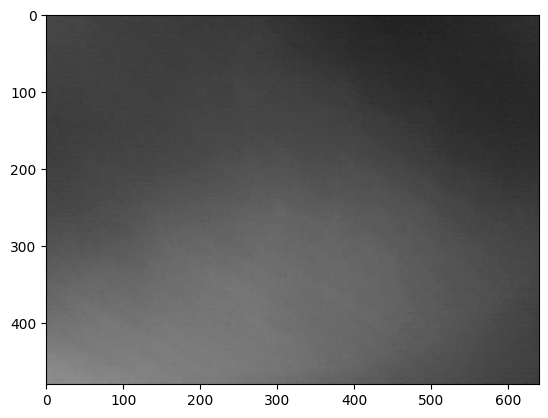

In [3]:
photo: ndphoto = vc.photo()

imshow(photo)

**Convert Photo Format**

Using the property `photo.format = ...` when the shapes will be equal; otherwise use `photo.convert(color_format)`.

Not all conversions are supported yet.

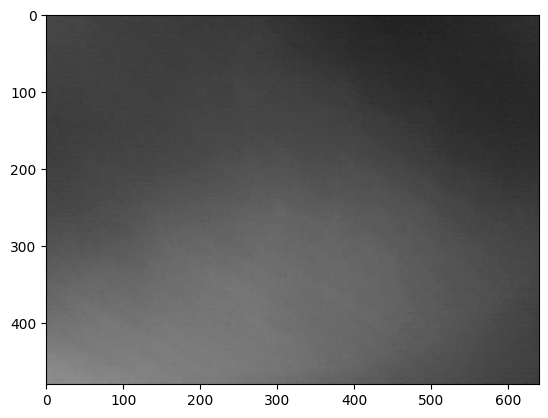

In [4]:
photo.format = "RGB"

imshow(photo)

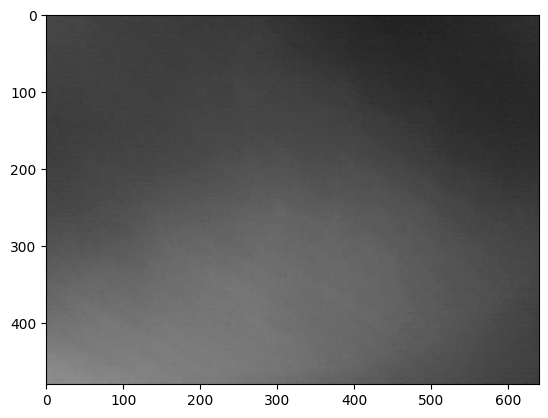

In [5]:
photo.format = "BGR"

imshow(photo)

photo.convert("YUV") was able to adjust the instance in-place!
`new_photo` is not `photo`:  True


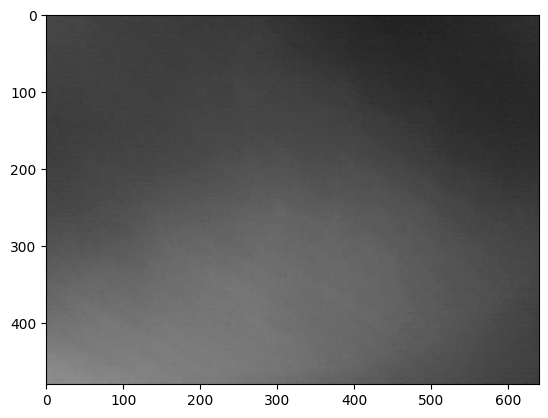

In [6]:
if not photo.convert("YUV"):
    print("photo.convert(\"YUV\") was able to adjust the instance in-place!")

# convert to a type that
photo.convert("BGR")

# BGR to RGBA will yield a different shape in the output, so the contents of the new photo
# will not be replace the instance in-place; so, convert will return a new ndphoto instance.
new_photo = photo.convert("RGBA")

# emphasize the fact that the `new_photo` and `photo` are different instances; 
# this confirms that the `photo` instance was not modified in-place.
print("`new_photo` is not `photo`: ", new_photo is not photo)

imshow(new_photo)


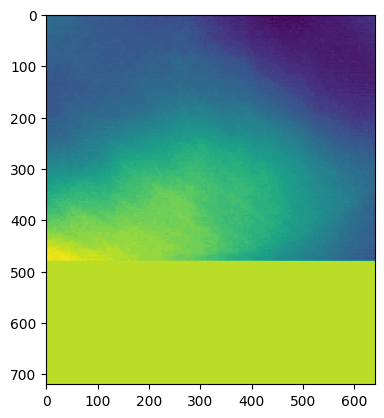

In [7]:
# equivalent to: yuv_photo = new_photo.convert("yuv_i420")
yuv_photo = new_photo.convert("yuv")

imshow(yuv_photo)